This notebook creates a WT network, then swappes the WT morphologies in the network file for degenerated PD morphologies where part of the dendrites have been removed. The synapses and inputs on the degenerated parts of the morphologies are automatically removed.

In [1]:
import os
from snudda.init import SnuddaInit

# Future location
pre_str = os.path.join("..", "..", "..", "..")

SNUDDA_DATA_WT = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD0")
SNUDDA_DATA_PD2 = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD2")

# Basal Ganglia Data folder
SNUDDA_DATA_WT = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD0")
SNUDDA_DATA_PD2 = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD2")

os.environ["SNUDDA_DATA"] = SNUDDA_DATA_WT
network_path_WT = "WT-network"
network_path_PD2 = "PD2-network"

si = SnuddaInit(struct_def={}, network_path=network_path_WT, random_seed=1234)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parki

In [2]:
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(os.getcwd(), ".ipython", "profile_default", "security", 
                      "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_WT, rc=rc)
sp.place()

Reading SNUDDA_DATA=None from WT-network/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from WT-network/network-synapses.hdf5


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_WT, rc=rc)
sd.detect()

Reading SNUDDA_DATA=None from WT-network/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from WT-network/network-synapses.hdf5
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 32/125 (404 neurons)
Processing hyper voxel : 31/125 (396 neurons)
Processing hyper voxel : 37/125 (377 neurons)
Processing hyper voxel : 36/125 (365 neurons)
Processing hyper voxel : 57/125 (332 neurons)
Processing hyper voxel : 56/125 (328 neurons)
Processing hyper voxel : 62/125 (278 neurons)
Processing hyper voxel : 61/125 (242 neurons)
Processing hyper voxel : 7/125 (136 neurons)
Processing hyper voxel : 6/125 (121 neurons)
Processing hyper voxel : 12/125 (98 neurons)
Processing hyper voxel : 27/125 (92 neurons)
Processing hyper voxel : 11/125 (81 neurons)
Processing hyper voxel : 26/125 (81 neurons)
Processing hyper voxel : 33/125 (60 neurons)
Processing hyper voxel : 51/125 (57 neurons)
Processing hyper voxel : 52/125 (55 neurons

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_WT, rc=rc)
sp.prune()

Worker synapses: 28/1415942 (heap size: 19)
Worker synapses: 1415942/1415942 (heap size: 0)
Read 1415942 out of total 1415942 synapses
Read 8 out of total 8 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_WT, 
                 input_config_file="dummy-input.json",   # This file does NOT have correct synapse parameters
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=None from WT-network/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from WT-network/network-synapses.hdf5
Loading 404 neurons with 70000 synapses and 3 gap junctions
Writing spikes to WT-network/input-spikes.hdf5


In [7]:
original_network_file = os.path.join(network_path_WT, "network-synapses.hdf5")
original_input_file = os.path.join(network_path_WT, "input-spikes.hdf5")

new_network_file = os.path.join(network_path_PD2, "network-synapses.hdf5")
new_input_file = os.path.join(network_path_PD2, "input-spikes.hdf5")

In [8]:
from snudda.utils.swap_to_degenerated_morphologies import SwapToDegeneratedMorphologies

swap = SwapToDegeneratedMorphologies(original_network_file=original_network_file,
                                    new_network_file=new_network_file,
                                    original_snudda_data_dir=SNUDDA_DATA_WT,
                                    new_snudda_data_dir=SNUDDA_DATA_PD2,
                                    original_input_file=original_input_file,
                                    new_input_file=new_input_file,
                                    filter_axon=True)
swap.write_new_network_file()
swap.write_new_input_file()
swap.close()

Loading 404 neurons with 70000 synapses and 3 gap junctions
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Writing new network to PD2-network/network-synapses.hdf5
Loading synapses into memory.
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neu

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Reading SNUDDA_DATA=None from WT-network/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from WT-network/network-synapses.hdf5
Loading 404 neurons with 70000 synapses and 3 gap junctions
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from PD2-network/network-synapses.hdf5
Loading 404 neurons with 35914 synapses and 3 gap junctions
Plotting 397 external synapses
Plotting 280 external synapses
Figure written: PD2-network/figures/input-to-1-iSPN_28-and-internal-synapses.png


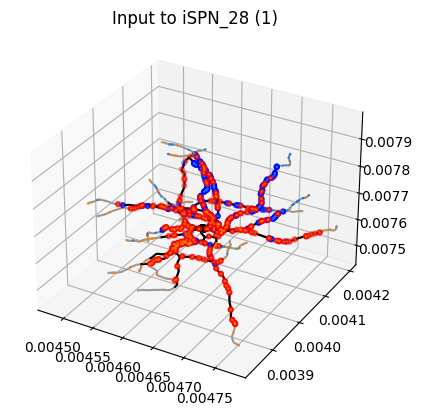

In [9]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_WT,
                      degenerated_network_path=network_path_PD2)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)